In [37]:
import numpy as np
import pandas as pd
##import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
car_data=pd.read_csv('USA_cars_datasets.csv',skiprows=1,header=None)
car_data.columns =['n','price', 'brand', 'model', 'year', 'title_status', 'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition']
#print(car_data) #2499 rows
###Cleaning the dataset
###################################################################################### finding 'canada'
canada_values = (car_data[car_data['country']==" canada"]).index.values
car_data.drop(canada_values,inplace=True)
#print(car_data) #2492 rows and 13 columns
#print('SWAG CANADA')
###################################################################################### finding price 0's
#print(car_data.price.value_counts())
price_values = (car_data[car_data['price']==0]).index.values
car_data.drop(price_values,inplace=True)
#print(car_data) #2449 rows and 13 columns
#print('SWAG ZERO')
###################################################################################### finding salvage insurance
#print(car_data.title_status.value_counts())
salvage_values = (car_data[car_data['title_status']=="salvage insurance"]).index.values
#print(salvage_values)
car_data.drop(salvage_values,inplace=True)
#print(car_data) #2327 rows and 13 columns
#print("SWAG SALVAGE")
##################################################################################### finding listing expired
expired_values=(car_data[car_data['condition']=="Listing Expired"]).index.values
#print(expired_values)
car_data.drop(expired_values,inplace=True)
#print(car_data) #2327 rows and 13 columns
#print("SWAG EXPIRED")
###################################################################################Fix condition(time): convert to hours
car_data['condition']=car_data['condition'].apply(lambda x: float(x.split()[0])*24 if x.split()[1]=='days' else(float(x.split()[0])/60.0 if x.split()[1]=='minutes' else float(x.split()[0])))
######################################################################################### Removing replicated data
car_data.drop(661,inplace=True)
##########################################################################################################################Tranforming year to age of vehicle
car_data['year']=2021-car_data['year']

################################################################################################ Creating a new feature miles/year
car_data['mpy']=car_data['mileage']/car_data['year']

###################################################################################### Dropping columns
#car_data_new = car_data.drop(columns=['n','vin','lot','condition'])
car_data_new = car_data.drop(columns=['n','country','title_status','lot','vin'])
#print(car_data_new) #2327 rows and 12 columns
#print("SWAG COLUMN")
##2306 rows with 8 columns

In [38]:
###################################################################################### Transform strings to shorts for the data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
car_data_new[['brand','model','color','state']]=car_data_new[['brand','model','color','state']].apply(le.fit_transform)
car_data_new.head()

,price,brand,year,mileage,color,state,condition,mpy
0,6300,26,13,274117.0,2,21,240.0,21085.923077
1,2899,8,10,190552.0,35,31,144.0,19055.200000
2,5350,7,3,39590.0,35,7,48.0,13196.666667
3,25000,8,7,64146.0,4,35,22.0,9163.714286
4,27700,5,3,6654.0,30,6,22.0,2218.000000


In [39]:
list(car_data_new.columns)

['price', 'brand', 'year', 'mileage', 'color', 'state', 'condition', 'mpy']

In [40]:
scaler=preprocessing.StandardScaler()
car_data_new[['brand','model','year','mileage','color','state','condition','mpy']]=scaler.fit_transform(car_data_new[['brand','model','year','mileage','color','state','condition','mpy']])
car_data_new.head()

,price,brand,year,mileage,color,state,condition,mpy
0,6300,2.769758,3.660533,5.328654,-1.299868,0.137626,3.086849,1.481124
1,2899,-0.302176,2.466645,3.382251,0.774002,1.042576,1.484784,1.153996
2,5350,-0.472839,-0.319095,-0.133968,0.774002,-1.129304,-0.117282,0.210250
3,25000,-0.302176,1.272756,0.437992,-1.174179,1.404556,-0.551175,-0.439415
4,27700,-0.814165,-0.319095,-0.901116,0.459779,-1.219799,-0.551175,-1.558295


In [41]:
###Building Training and Testing Datasets

###################################################################################### Find X and y
X=car_data_new.iloc[0:,1:8]
#print("X DATA")
#print(X)
y=car_data_new.iloc[:,0]
#print("Y DATA")
#print(y)
###################################################################################### KNeighborsRegressor


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)


In [42]:
X

,brand,year,mileage,color,state,condition,mpy
0,2.769758,3.660533,5.328654,-1.299868,0.137626,3.086849,1.481124
1,-0.302176,2.466645,3.382251,0.774002,1.042576,1.484784,1.153996
2,-0.472839,-0.319095,-0.133968,0.774002,-1.129304,-0.117282,0.210250
3,-0.302176,1.272756,0.437992,-1.174179,1.404556,-0.551175,-0.439415
4,-0.814165,-0.319095,-0.901116,0.459779,-1.219799,-0.551175,-1.558295
...,...,...,...,...,...,...,...
2494,2.428432,-0.717058,-0.506199,0.459779,-1.491284,-0.517799,-0.014013
2495,2.428432,-0.319095,-0.251290,0.774002,-1.219799,-0.567863,-0.060219
2496,2.428432,-0.319095,-0.320212,0.774002,-1.219799,-0.567863,-0.219107
2497,2.428432,-0.319095,-0.297781,-1.299868,-1.219799,-0.117282,-0.167397


1
Accuracy_1: -0.05857570798102696
Accuracy_2: -0.05857570798102696
2
Accuracy_1: 0.15118950581394297
Accuracy_2: 0.15118950581394297
3
Accuracy_1: 0.26330551894948484
Accuracy_2: 0.26330551894948484
4
Accuracy_1: 0.3221489159186651
Accuracy_2: 0.3221489159186651
5
Accuracy_1: 0.28737581656143174
Accuracy_2: 0.28737581656143174
6
Accuracy_1: 0.27799111152641853
Accuracy_2: 0.27799111152641853
7
Accuracy_1: 0.29219351305653385
Accuracy_2: 0.29219351305653385
8
Accuracy_1: 0.31135906376232403
Accuracy_2: 0.31135906376232403
9
Accuracy_1: 0.32285730986284256
Accuracy_2: 0.32285730986284256
10
Accuracy_1: 0.3355285318154484
Accuracy_2: 0.3355285318154484
11
Accuracy_1: 0.34325659433003597
Accuracy_2: 0.34325659433003597
12
Accuracy_1: 0.34101513914227166
Accuracy_2: 0.34101513914227166
13
Accuracy_1: 0.3271338082552816
Accuracy_2: 0.3271338082552816
14
Accuracy_1: 0.32759427485765347
Accuracy_2: 0.32759427485765347
15
Accuracy_1: 0.3210428207537168
Accuracy_2: 0.3210428207537168
16
Accurac

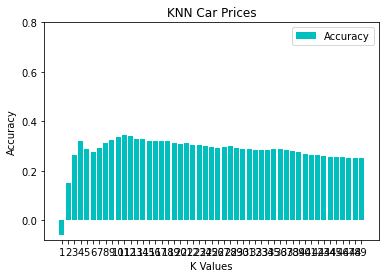

-----------
{'n_neighbors': 27}
0.08210060761407553
Linear Regression Score:  0.1313849008524406
-------------------------------------------------------- testing ridge
Ridge Regression Score:  0.13148269211041108
Ridge Regression Score2:  0.13148269211041108
-------------------------------------------------------- testing lasso
Lasso Regression Score:  0.13142436131398982
Lasso Regression Score2:  0.13142436131398982
-------------------------------------------------------- testing DecisionTreeRegressor
Decision Tree Regressor Score:  0.10063295374255099
Decision Tree Regressor Score2:  0.10063295374255099
-------------------------------------------------------- testing Support Vector Regressor
Support Vector Regressor Score:  -0.0011476092592082043
Support Vector Regressor Score2:  -0.0011476092592082043
-------------------------------------------------------- testing MLPRegressor


C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLP Score:  0.266709647846436
MLP Score2:  0.266709647846436
-------------------------------------------------------- testing RandomForestRegressor
rf Score:  0.266709647846436
rf Score2:  0.266709647846436


In [43]:
#Modeling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

#reg = KNeighborsRegressor(n_neighbors=56)
#reg.fit(X_train, y_train)
#print(reg.score(X_test, y_test))
accuracy = []
R1=1
R2=50
T=10


# Getting All Accuracies
for k in range(1,50):

    knn = KNeighborsRegressor(n_neighbors=k)

    knn.fit(X_train,y_train)

    y_pred = knn.predict(X_test)
    print(k)
    print("Accuracy_1:",knn.score(X_test, y_test))
    print("Accuracy_2:",r2_score(y_test, y_pred)) # gives same accuracy as the accuracy above
    accuracy.append(knn.score(X_test,y_test))
    scores = cross_val_score(knn, X, y, cv=T)

###################################################################################### Plotting Logic is Here
K = np.arange(R1,R2)
width = .8
fig,ax = plt.subplots()
ax.bar(K, accuracy, width, color='c')
ax.set_ylabel('Accuracy')
ax.set_xlabel('K Values')
ax.set_title('KNN Car Prices')
ax.set_xticks(K)
ax.set_xticklabels(K)
ax.set_yticks(np.arange(0, 1, .2))
ax.legend(labels=['Accuracy'])
plt.show()

###################################################################################### GridSearchCV Logic is Here
################################################### LOOK AT THIS PLZ!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
from sklearn.model_selection import GridSearchCV
knn2 = KNeighborsRegressor()
param_grid = {"n_neighbors": np.arange(R1, R2)}
##print(param_grid);
knn_gscv = GridSearchCV(knn2, param_grid, cv=T)
knn_gscv.fit(X, y)
print("-----------")
print(knn_gscv.best_params_)

print(knn_gscv.best_score_)

###################################################################################### Linear Regression part
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_score = lr.score(X_test,y_test)
print("Linear Regression Score: ",lr_score)

#a = lr.coef_
#b = lr.intercept_
#print("Estimated model slope, a:",a)
#print("Estimated model intercept, b:",b)

print("-------------------------------------------------------- testing ridge")
# Plot the Regression Line
from sklearn.linear_model import Ridge
ri = Ridge(alpha=1.0)
ri.fit(X_train, y_train)
ri_pred = ri.predict(X_test)
ri_score = ri.score(X_test,y_test)
print("Ridge Regression Score: ",ri_score)
print("Ridge Regression Score2: ",r2_score(y_test, ri_pred))

print("-------------------------------------------------------- testing lasso")
# Plot the Regression Line
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_score = lasso.score(X_test,y_test)
print("Lasso Regression Score: ",lasso_score)
print("Lasso Regression Score2: ",r2_score(y_test, lasso_pred))

print("-------------------------------------------------------- testing DecisionTreeRegressor")
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(X_train, y_train)
DTR_pred = DTR.predict(X_test)
DTR_score = DTR.score(X_test,y_test)
print("Decision Tree Regressor Score: ",DTR_score)
print("Decision Tree Regressor Score2: ",r2_score(y_test, DTR_pred))

print("-------------------------------------------------------- testing Support Vector Regressor")
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
svr_score = svr.score(X_test,y_test)
print("Support Vector Regressor Score: ",svr_score)
print("Support Vector Regressor Score2: ",r2_score(y_test, svr_pred))

print("-------------------------------------------------------- testing MLPRegressor")
from sklearn.neural_network import MLPRegressor
#mlp = MLPRegressor(solver='lbfgs', hidden_layer_sizes=50, max_iter=10000, random_state=0)
mlp = MLPRegressor(max_iter=5000, random_state=0)
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)
mlp_score = mlp.score(X_test,y_test)
print("MLP Score: ",mlp_score)
print("MLP Score2: ",r2_score(y_test, mlp_pred))

print("-------------------------------------------------------- testing RandomForestRegressor")
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = mlp.predict(X_test)
rf_score = mlp.score(X_test,y_test)
print("rf Score: ",rf_score)
print("rf Score2: ",r2_score(y_test, rf_pred))



